# CompSci 273A - HW 1 
## Jennifer Bryson 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 - Perceptron Learning

#### Part A: 
Problem Statement:

Create 9-dimensional input vectors in two classes by drawing two cluster centers from a spherical Gaussian distribution, then scaling down the width of that Gaussian by a factor of alpha in (0,1) to create N cluster member for each cluster by adding in noise. 

In [2]:
alpha=0.1  #alpha in (0,1) -- smaller alpha makes each point cloud more tightly together
N=30 #number of points per cluster
center1 = np.random.randn(9,1)
center2 = np.random.randn(9,1)

In [3]:
points_c1 = alpha * np.random.randn(9,N) + center1
points_c2 = alpha * np.random.randn(9,N) + center2

#### Part B:
Problem Statement: 

Use the least squares formula formula to discriminate between the two classes.  Numerically evaluate its accuracy, by averaging over draws of cluster centers and cluster members, and by systematically varying alpha and N (make tables or plots).  All reported results should have numerically estimated error bars arising from stated probability distributions.

Solution idea:

Currently, our training points in $R^9$ are stored in the matrices points_c1 and points_c2.  First we'll concatenate these two matrices horizontally to be one matrix whose columns are our training points, then we'll add a row of ones to the top of this matrix to make a matrix that has 10 row and 2N columns.  We'll call the transpose of this matrix, Xtilde $\in R^{2N \times 10}$.

Now we need to make our target matrix, which tells us which of the two clusters our points came from.  Points generated from center1 will have target vector $[1,0]^T$, and points generated from center2 will have target vector $[0,1]^T$.  For us, the target matrix will be in $R^{2N \times 2}$, where row 1 is the transpose of the target vector to row 1 of Xtilde.  By our construction, the first N rows will all be [1,0] and the last N rows will all be [0,1].

Since the least squares problem has the nice closed form solution, we are now able to calculate our weight vectors,$W = pseudoinverse(Xtilde) * T = (Xtilde^T Xtilde)^{-1}Xtilde^T T \in R^{10 \times 2}$.

Great, this gives us our weights!  

Then we test some points and see how it did.  For some new point $x \in R^9$, we will make it into xtilde by adding a one in the first row and making it a vector in $R^{10}$.  And $W^T xtilde$ will give us a two dimensional vector, if the first coordinate is larger, then we decide $x$ is in Class 1 - the first Gaussian cloud.  Similarly, if the second coordinate is larger, then we decide $x$ is in Class 2 - the second Gaussian cloud.  Our algorithm will then count the number of test points it got correct (out of 200 test points total - 100 per Gaussian cloud).  

Lastly, we'll repeat this test 100 different times, for 100 different centers and training points.  From these 100 trials, we can get the average percentage of time that the algorithm was correct as well as the standard deviation. We'll display our findings in a table that depends on alpha and N="number of training points".

In [4]:
num_loops = 100
num_alphas = 9
num_Ns = 9
looped_results = np.random.rand(1,num_loops,num_alphas,num_Ns)

for k in range(num_loops):
    a_counter=0
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        N_counter = 0
        for N in [2,3,4,5,6,7,8,9,10]: #number of points per cluster
            center1 = np.random.randn(9,1)
            center2 = np.random.randn(9,1)
            points_c1 = alpha * np.random.randn(9,N) + center1
            points_c2 = alpha * np.random.randn(9,N) + center2
            points = np.hstack((points_c1, points_c2))
            Xtilde = np.transpose( np.vstack((np.ones(2*N), points)) )
            T = np.vstack((np.array([[1,0],]*N),np.array([[0,1],]*N)))
            W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xtilde),Xtilde)),np.transpose(Xtilde)),T)

            #testing points from cluster 1
            num_tests = 100
            X_test = alpha * np.random.randn(9,num_tests) + center1
            X_test_tilde = np.vstack((np.ones(num_tests), X_test))
            X_determined = np.matmul(np.transpose(W),X_test_tilde)
            num_correct_c1 = 0
            for i in range(num_tests):
                if X_determined[0,i] > 0.5:
                    num_correct_c1 = num_correct_c1 + 1

            #testing points from cluster 2
            X_test = alpha * np.random.randn(9,num_tests) + center2
            X_test_tilde = np.vstack((np.ones(num_tests), X_test))
            X_determined = np.matmul(np.transpose(W),X_test_tilde)
            num_correct_c2 = 0
            for i in range(num_tests):
                if X_determined[0,i] < 0.5:
                    num_correct_c2 = num_correct_c2 + 1
            #print 'Out of 200 tests (100 per cluster), the algorithm correctly classified:'
            #print num_correct_c1 + num_correct_c2 , (num_correct_c1 + num_correct_c2)/float(num_tests*2)
            looped_results[0,k,a_counter,N_counter] = (num_correct_c1 + num_correct_c2)/float(num_tests*2)
            N_counter = N_counter+1
        a_counter = a_counter+1
#Note: Row 1 is alpha = 0.1, Row 2 is alpha = 0.2, ..., Row 9 is alpha = 0.9
#Note: Column 1 is N = 2, Column 2 is N = 3, ..., Column 9 is N = 10
#print looped_results

In [5]:
averaged_means = np.zeros((num_alphas,num_Ns)) 
averaged_stds = np.zeros((num_alphas,num_Ns)) 

for i in range(num_alphas):
    for j in range(num_Ns):

        intermediate = np.zeros((1,num_loops))
        for k in range(num_loops):
            intermediate[0,k] = looped_results[0,k,i,j]
        averaged_means[i,j] = np.mean(intermediate)
        averaged_stds[i,j] = np.std(intermediate)

#print averaged_means
#print averaged_stds

In [6]:
result_str = [['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','','']]

for i in range(num_alphas):
    for j in range(num_Ns):
        result_str[i][j] = str(round(averaged_means[i,j], 3)) + " " + u"\u00B1"  + " " + str(round(averaged_stds[i,j], 3))


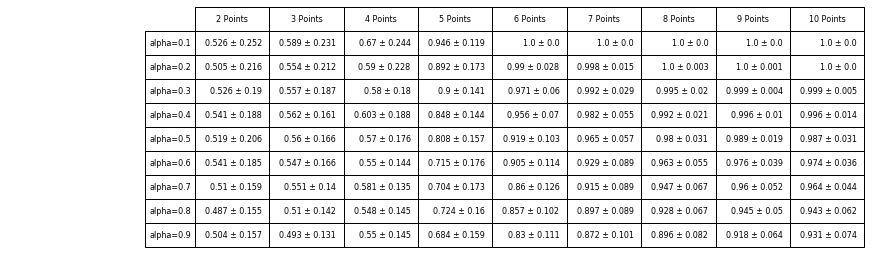

In [7]:
#make a table whose entries are strings of the mean +/- the std for each alpha,N pair
fig = plt.figure()
ax = fig.add_subplot(111)
col_labels = ('2 Points', '3 Points', '4 Points', '5 Points', '6 Points', '7 Points', '8 Points','9 Points', '10 Points')
row_labels = ['alpha=0.1', 'alpha=0.2', 'alpha=0.3', 'alpha=0.4', 'alpha=0.5', 'alpha=0.6', 'alpha=0.7', 'alpha=0.8', 'alpha=0.9']

the_table = plt.table(cellText=result_str,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center right')
the_table.set_fontsize(30)
the_table.scale(2, 2)
ax.axis("off")

plt.show()
#fig.savefig('Prob_1_Part_B.pdf')

This table above shows the percentage of time the test data is correctly categorized.  More specifically, for each alpha and for each number of training points, we test 200 testing points and find the percentage of testing points that were accurately classified.  This is repeated for 100 different cluster centers and training points.  The mean and standard deviation of the percentage of accurately classified points is given in the table.

For example, we see that when we only have 2 training points, the accuracy of classifying is really around 50%, which is the accuracy you'd get from purely guessing which of the two clusters the point belongs in.  However, when we add more training points, the accuracy increases.  Furthermore, as expected, smaller values of alpha are more accurate since our two clusters are more tight and thus more different from each other.

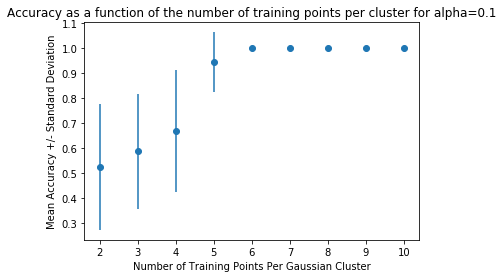

In [9]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[0,:]  #alpha=0.1
yerr = averaged_stds[0,:] #alpha=0.1

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.1")
plt.show()

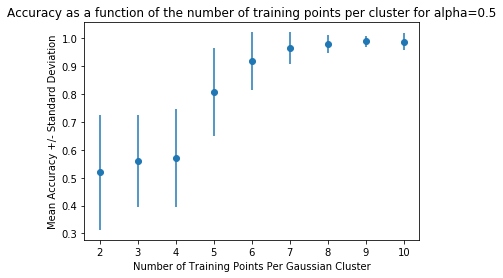

In [10]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[4,:]  #alpha=0.5
yerr = averaged_stds[4,:] #alpha=0.5

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.5")
plt.show()

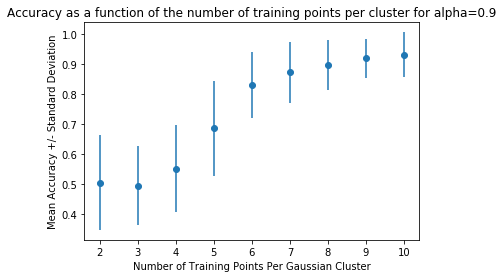

In [11]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[8,:]  #alpha=0.9
yerr = averaged_stds[8,:] #alpha=0.9

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.9")
plt.show()

From these three plots, we see that we really need at least 5 training points per cluster in order to have a clustering algorithm that does better than pure guessing (50% accuracy, since we have just two clusters).  We also see that smaller alpha values are much more consistent in their accuracy, and thus have low standard deviation.  Let's look at the accuracy as a function of alpha now.  For reasons just mentioned, we'll just look at cases when we have at least 5 training points per cluster.

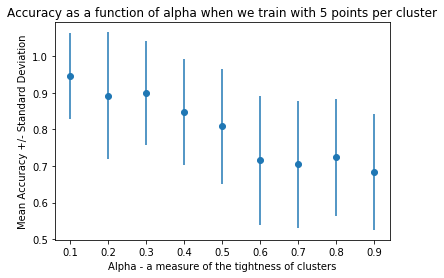

In [12]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,3]  #5 training points per cluster
yerr = averaged_stds[:,3] #5 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 5 points per cluster")
plt.show()

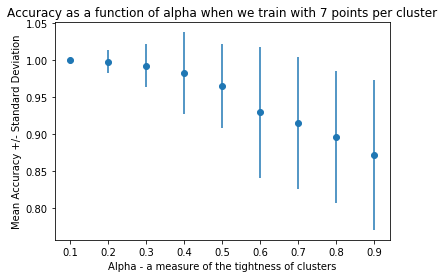

In [13]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,5]  #7 training points per cluster
yerr = averaged_stds[:,5] #7 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 7 points per cluster")
plt.show()

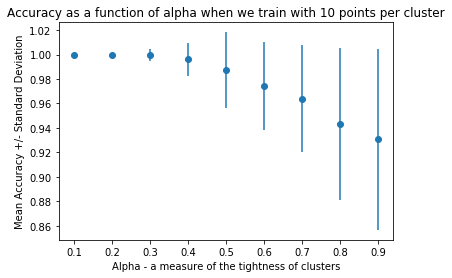

In [14]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,8]  #10 training points per cluster
yerr = averaged_stds[:,8] #10 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 10 points per cluster")
plt.show()

As expected, smaller alpha is more accuracy and consistent.  Although adding more training points per cluster allow larger alphas to improve.  

#### Part C:
Problem Statement: 

Use the Perceptron Learning Algorithm to do the same, and evaluate its results the same way but fix alpha and N from 1(b) and instead vary as parameters the number of iterations of the algorithm and the size of the training set.  (Report performance on the test set, not the training set.)

Solution Idea:

First we will create our training points that belong to either cluster 1 or cluster 2, $x \in R^9$.  As in Part B, we'll add a 1 to the point vectors (to allow for lines not through the origin), and thus xhat $\in R^{10}$.  Then we initialize $w$ = "weights" $\in R^{10}$ and $\eta$ = "step size" = 0.1.  Also I will fix alpha = 0.5.

What we want is for points from cluster 1 to be such that $w \cdot x \geq 0$ and for points from cluster 2 to be such that $w \cdot x \leq 0$.  So pick a random training set point, xhat $\in R^{10}$, and dot it with the weight vector, w.  If that point is accurately classified from the rule just mentioned, then we'll do nothing.  But if that dot product is zero or the wrong sign, then we will update w to be w+$\eta$*d*xhat, where d is 1 if xhat is from cluster 1 and d is -1 if xhat is from cluster 2.

Repeating the above step, our weight function will converge to the solution assuming linear separability of the two clusters.

In [15]:
def initalize_train_p_l_a(num_iterations, num_pts_cluster, alpha, center1, center2, eta):
    '''this function creates the training points and trains the model'''
    N=num_pts_cluster #number of points per cluster
    points_c1 = alpha * np.random.randn(9,N) + center1
    points_c2 = alpha * np.random.randn(9,N) + center2
    points = np.hstack((points_c1, points_c2))  #each column is a point
    Xhat = np.vstack((np.ones(2*N), points)) 
    w = np.zeros((1,10))
    
    import random
    for i in range(num_iterations):
        point_number = random.randint(1,2*N) -1  #gives us a random number between 0 and 2N-1
        if point_number < N: #if you're in class 1 
            if np.matmul(w,Xhat[:,point_number]) <= 0: #if you were miss classified
                w = w + eta*Xhat[:, point_number].T
        else:  #you're in class 2
            if np.matmul(w,Xhat[:,point_number]) >= 0: #if you were miss classified
                w = w - eta*Xhat[:, point_number].T
    return w

In [16]:
def test_p_l_a(num_tests_per_cluster, alpha, center1, center2,w):
    '''this function creates training data and gives the percentage of correctly classified points'''
    #test points from cluster 1:
    num_tests=num_tests_per_cluster
    tests_c1 = alpha * np.random.randn(9,num_tests) + center1
    tests_c1_hat = np.vstack((np.ones(num_tests), tests_c1)) 
    num_correct_c1 = 0
    for i in range(num_tests):
        if np.matmul(w,tests_c1_hat)[0,i] > 0:
            num_correct_c1 = num_correct_c1 + 1
    #print num_correct_c1

    #test points from cluster 2:
    tests_c2 = alpha * np.random.randn(9,num_tests) + center2
    tests_c2_hat = np.vstack((np.ones(num_tests), tests_c2)) 
    num_correct_c2 = 0
    for i in range(num_tests):
        if np.matmul(w,tests_c2_hat)[0,i] < 0:
            num_correct_c2 = num_correct_c2 + 1
    #print num_correct_c2

    percentage_correct = (num_correct_c1 + num_correct_c2)/float(2*num_tests)
    return percentage_correct

In [17]:
def percep_learn_alg(num_iterations, num_pts_cluster):
    '''this function puts together the training and testing functions'''
    center1 = np.random.randn(9,1)
    center2 = np.random.randn(9,1)
    alpha=0.5  #alpha in (0,1) -- smaller alpha makes each point cloud more tightly together
    eta = 0.1 #step size

    w = initalize_train_p_l_a(num_iterations, num_pts_cluster, alpha, center1, center2,eta) #inputs are: num_iterations, num_pts_cluster
    return test_p_l_a(100, alpha, center1, center2,w)

Below we will repeat the calculation for 200 different instances with the same variables and average our results to obtain the mean and standard deviation for a variety of interations and a variety of number of training points per cluster.

In [18]:
result_str_pla = [['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','','']]
avg_means = np.zeros((9,9))  #just for the graphs - not the table
avg_stds = np.zeros((9,9))   #just for the graphs - not the table

itera_count = 0
for itera in [2,4,6,8,10,20,50,100,200]: #vary the number of iterations
    pts_count = 0
    for pts in [2,3,4,5,6,7,8,9,10]: #vary the number of training points per cluster
        num_loops = 200  #the number of times we run the code to average our percentage accuracy and get the std of accuracy
        vec = np.zeros((1,num_loops))
        for i in range(num_loops):
            vec[0,i] = percep_learn_alg(itera, pts)
        avg_means[itera_count,pts_count] = np.mean(vec)
        avg_stds[itera_count,pts_count] = np.std(vec)
        result_str_pla[itera_count][pts_count] = str(round(np.mean(vec), 3)) + " " + u"\u00B1"  + " " + str(round(np.std(vec), 3))
        pts_count= pts_count+1
    itera_count= itera_count+1

#print result_str_pla

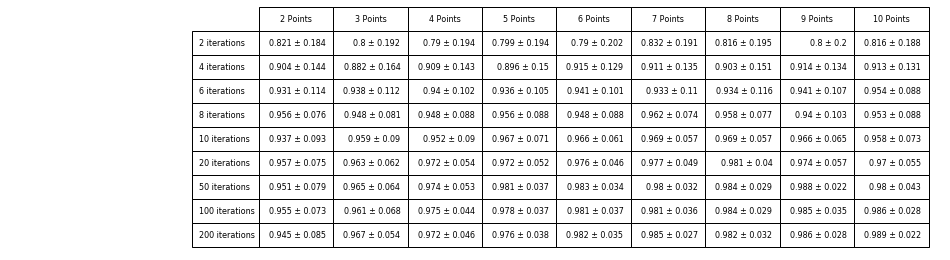

In [19]:
#make a table whose entries are strings of the mean +/- the std for each alpha,N pair
fig = plt.figure()
ax = fig.add_subplot(111)
col_labels = ('2 Points', '3 Points', '4 Points', '5 Points', '6 Points', '7 Points', '8 Points','9 Points', '10 Points')
row_labels = ['2 iterations', '4 iterations', '6 iterations', '8 iterations', '10 iterations', '20 iterations', '50 iterations', '100 iterations', '200 iterations']

the_table = plt.table(cellText=result_str_pla,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center right')
the_table.set_fontsize(30)
the_table.scale(2, 2)
ax.axis("off")

plt.show()
#fig.savefig('Prob_1_Part_C_from_code.pdf')

Great!  As expected, increasing the number of iterations helps out a lot (up to a point), and so does adding more training points.  Notice that for few iterations the standard deviations are around 20%, which is huge.  Luckily after 100 iterations and $\geq 5$ points, the standard deviation is around 3% which is much better. 

Note: As mentioned from the beginning, alpha is fixed to be 0.5.  Decreasing alpha would increase accuracy.

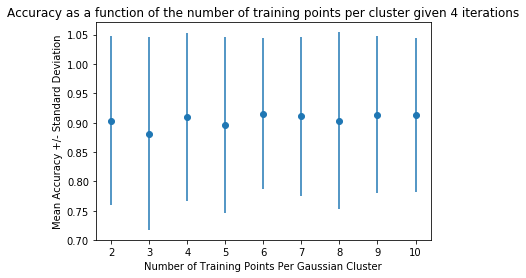

In [20]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[1,:]  #4 iterations
yerr = avg_stds[1,:] # 4 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 4 iterations")
plt.show()

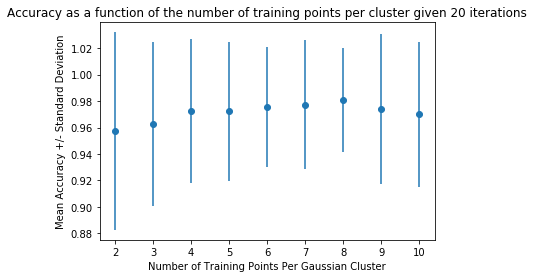

In [21]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[5,:]  # 20 iterations
yerr = avg_stds[5,:] # 20 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 20 iterations")
plt.show()

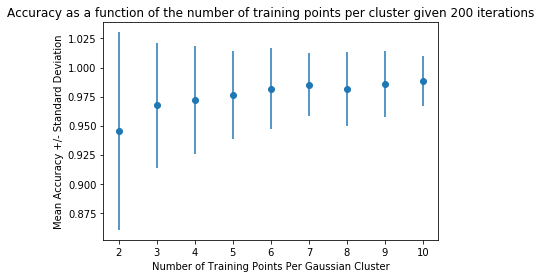

In [22]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[8,:]  #200 iterations
yerr = avg_stds[8,:] # 200 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 200 iterations")
plt.show()

The three plots above show that it takes both a lot of iterations and several training points per cluster in order to obtain consistent accuracy.

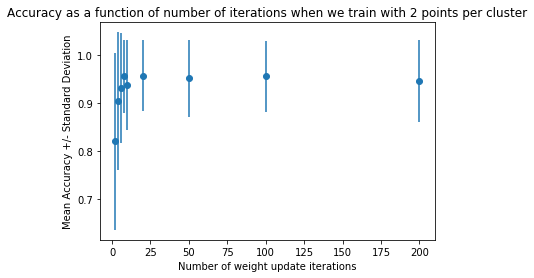

In [23]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,0]  #2 training points per cluster
yerr = avg_stds[:,0] #2 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 2 points per cluster")
plt.show()

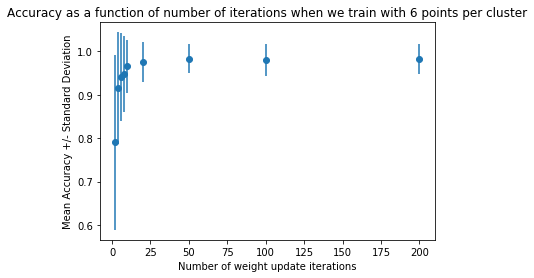

In [24]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,4]  #6 training points per cluster
yerr = avg_stds[:,4] #6 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 6 points per cluster")
plt.show()

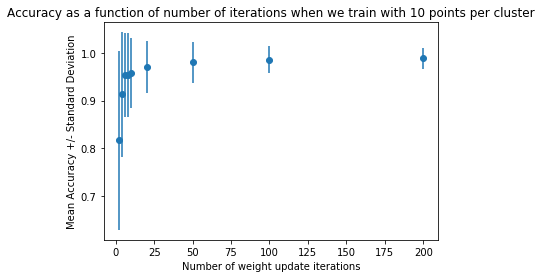

In [25]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,8]  #10 training points per cluster
yerr = avg_stds[:,8] #10 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 10 points per cluster")
plt.show()

The three previous figures show that having at least 20 iterations is very helpful for improving accuracy and consistency, regardless of the number of training points.  Beyond 100 interations doesn't seem to really add much improvement - at least not for that these values of training points.

***

### Problem 2 - Toy OCR


#### Part A: 
Problem Statement:

Create two patterns of $3 \times 3$ binary images with the same number of on and off pixels.  Add real-valued noise in a controlled way as in 1a, independently for each pixel.

Solution Idea:

We will simply store the $3 \times 3$ binary image pattern as a 9 dimensional vector by "flattening" it out.

In [26]:
alpha=0.1  #alpha in (0,1) -- smaller alpha makes each point cloud more tightly together
N=3 #number of points per cluster
center1 = [[0],[1],[0],[0],[1],[0],[1],[1],[0]]
center2 = [[1],[0],[1],[0],[0],[0],[1],[0],[1]]
points_c1 = alpha * np.random.randn(9,N) + center1
points_c2 = alpha * np.random.randn(9,N) + center2

#### Part B: 
Problem Statement: Same as in 1b

Note: All code below is identical to that in Problem 1B except for the two lines that define "center1" and "center2".

In [27]:
num_loops = 100
num_alphas = 9
num_Ns = 9
looped_results = np.random.rand(1,num_loops,num_alphas,num_Ns)

for k in range(num_loops):  #loop to average the results for more accuracy
    a_counter=0
    for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        N_counter = 0
        for N in [2,3,4,5,6,7,8,9,10]: #number of points per cluster
            center1 = [[0],[1],[0],[0],[1],[0],[1],[1],[0]]
            center2 = [[1],[0],[1],[0],[0],[0],[1],[0],[1]]
            points_c1 = alpha * np.random.randn(9,N) + center1
            points_c2 = alpha * np.random.randn(9,N) + center2
            points = np.hstack((points_c1, points_c2))
            Xtilde = np.transpose( np.vstack((np.ones(2*N), points)) )
            T = np.vstack((np.array([[1,0],]*N),np.array([[0,1],]*N)))
            W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xtilde),Xtilde)),np.transpose(Xtilde)),T)

            #testing points from cluster 1
            num_tests = 100
            X_test = alpha * np.random.randn(9,num_tests) + center1
            X_test_tilde = np.vstack((np.ones(num_tests), X_test))
            X_determined = np.matmul(np.transpose(W),X_test_tilde)
            num_correct_c1 = 0
            for i in range(num_tests):
                if X_determined[0,i] > 0.5:
                    num_correct_c1 = num_correct_c1 + 1

            #testing points from cluster 2
            X_test = alpha * np.random.randn(9,num_tests) + center2
            X_test_tilde = np.vstack((np.ones(num_tests), X_test))
            X_determined = np.matmul(np.transpose(W),X_test_tilde)
            num_correct_c2 = 0
            for i in range(num_tests):
                if X_determined[0,i] < 0.5:
                    num_correct_c2 = num_correct_c2 + 1
            #print 'Out of 200 tests (100 per cluster), the algorithm correctly classified:'
            #print num_correct_c1 + num_correct_c2 , (num_correct_c1 + num_correct_c2)/float(num_tests*2)
            looped_results[0,k,a_counter,N_counter] = (num_correct_c1 + num_correct_c2)/float(num_tests*2)
            N_counter = N_counter+1
        a_counter = a_counter+1
#Note: Row 1 is alpha = 0.1, Row 2 is alpha = 0.2, ..., Row 9 is alpha = 0.9
#Note: Column 1 is N = 2, Column 2 is N = 3, ..., Column 9 is N = 10
#print looped_results

In [28]:
averaged_means = np.zeros((num_alphas,num_Ns)) 
averaged_stds = np.zeros((num_alphas,num_Ns)) 

for i in range(num_alphas):
    for j in range(num_Ns):

        intermediate = np.zeros((1,num_loops))
        for k in range(num_loops):
            intermediate[0,k] = looped_results[0,k,i,j]
        averaged_means[i,j] = np.mean(intermediate)
        averaged_stds[i,j] = np.std(intermediate)

#print averaged_means
#print averaged_stds

In [29]:
result_str = [['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','','']]

for i in range(num_alphas):
    for j in range(num_Ns):
        result_str[i][j] = str(round(averaged_means[i,j], 3)) + " " + u"\u00B1"  + " " + str(round(averaged_stds[i,j], 3))

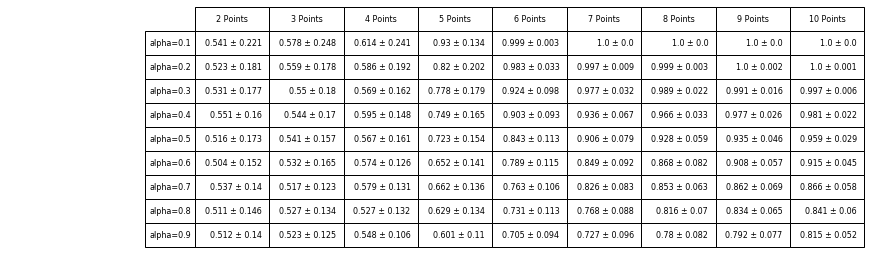

In [30]:
#make a table whose entries are strings of the mean +/- the std for each alpha,N pair
fig = plt.figure()
ax = fig.add_subplot(111)
col_labels = ('2 Points', '3 Points', '4 Points', '5 Points', '6 Points', '7 Points', '8 Points','9 Points', '10 Points')
row_labels = ['alpha=0.1', 'alpha=0.2', 'alpha=0.3', 'alpha=0.4', 'alpha=0.5', 'alpha=0.6', 'alpha=0.7', 'alpha=0.8', 'alpha=0.9']

the_table = plt.table(cellText=result_str,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center right')
the_table.set_fontsize(30)
the_table.scale(2, 2)
ax.axis("off")

plt.show()
#fig.savefig('Prob_2_Part_B.pdf')

Interestingly, comparing this with our table in Problem 1B, the algorithm seems to have a little more difficulty here.  But the results are surely very similar.

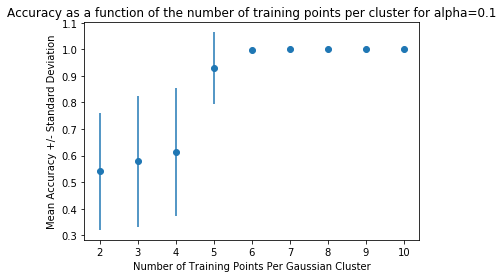

In [31]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[0,:]  #alpha=0.1
yerr = averaged_stds[0,:] #alpha=0.1

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.1")
plt.show()

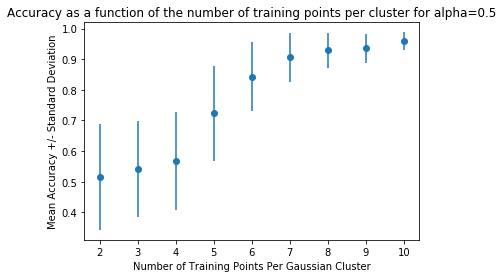

In [32]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[4,:]  #alpha=0.5
yerr = averaged_stds[4,:] #alpha=0.5

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.5")
plt.show()

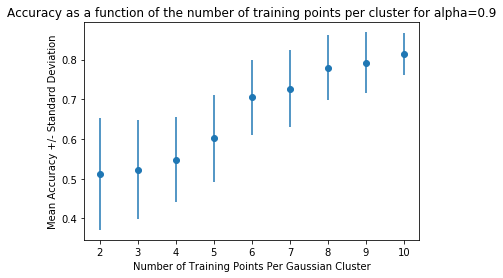

In [33]:
x = [2,3,4,5,6,7,8,9,10]
y = averaged_means[8,:]  #alpha=0.9
yerr = averaged_stds[8,:] #alpha=0.9

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster for alpha=0.9")
plt.show()

Again we see that at least 5 points per cluster are needed to get accuracy much better than guessing.  Of course, smaller alpha still is more consistent and accurate.  Now let's vary alpha for a fixed number of training points per cluster.

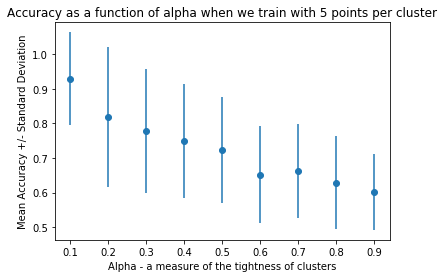

In [34]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,3]  #5 training points per cluster
yerr = averaged_stds[:,3] #5 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 5 points per cluster")
plt.show()

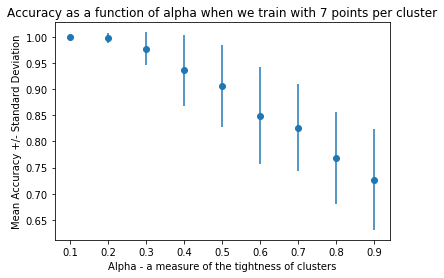

In [35]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,5]  #7 training points per cluster
yerr = averaged_stds[:,5] #7 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 7 points per cluster")
plt.show()

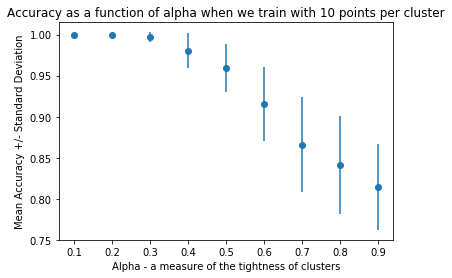

In [36]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = averaged_means[:,8]  #10 training points per cluster
yerr = averaged_stds[:,8] #10 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Alpha - a measure of the tightness of clusters')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of alpha when we train with 10 points per cluster")
plt.show()

Again, more training points improve accuracy and consistency.  The more training points we have, the larger alpha value we can accurately separate.

#### Part C: 
Problem Statement: Same as in 1c

Note: All code below is identical to that in Problem 1C except for the two lines that define "center1" and "center2".

In [37]:
def initalize_train_p_l_a(num_iterations, num_pts_cluster, alpha, center1, center2, eta):
    '''this function creates the training points and trains the model'''
    N=num_pts_cluster #number of points per cluster
    points_c1 = alpha * np.random.randn(9,N) + center1
    points_c2 = alpha * np.random.randn(9,N) + center2
    points = np.hstack((points_c1, points_c2))  #each column is a point
    Xhat = np.vstack((np.ones(2*N), points)) 
    w = np.zeros((1,10))
    
    import random
    for i in range(num_iterations):
        point_number = random.randint(1,2*N) -1  #gives us a random number between 0 and 2N-1
        if point_number < N: #if you're in class 1 
            if np.matmul(w,Xhat[:,point_number]) <= 0: #if you were miss classified
                w = w + eta*Xhat[:, point_number].T
        else:  #you're in class 2
            if np.matmul(w,Xhat[:,point_number]) >= 0: #if you were miss classified
                w = w - eta*Xhat[:, point_number].T
    return w

In [38]:
def test_p_l_a(num_tests_per_cluster, alpha, center1, center2,w):
    '''this function creates training data and gives the percentage of correctly classified points'''
    #test points from cluster 1:
    num_tests=num_tests_per_cluster
    tests_c1 = alpha * np.random.randn(9,num_tests) + center1
    tests_c1_hat = np.vstack((np.ones(num_tests), tests_c1)) 
    num_correct_c1 = 0
    for i in range(num_tests):
        if np.matmul(w,tests_c1_hat)[0,i] > 0:
            num_correct_c1 = num_correct_c1 + 1
    #print num_correct_c1

    #test points from cluster 2:
    tests_c2 = alpha * np.random.randn(9,num_tests) + center2
    tests_c2_hat = np.vstack((np.ones(num_tests), tests_c2)) 
    num_correct_c2 = 0
    for i in range(num_tests):
        if np.matmul(w,tests_c2_hat)[0,i] < 0:
            num_correct_c2 = num_correct_c2 + 1
    #print num_correct_c2

    percentage_correct = (num_correct_c1 + num_correct_c2)/float(2*num_tests)
    return percentage_correct

In [39]:
def percep_learn_alg(num_iterations, num_pts_cluster):
    '''this function puts together the training and testing functions'''
    center1 = [[0],[1],[0],[0],[1],[0],[1],[1],[0]]
    center2 = [[1],[0],[1],[0],[0],[0],[1],[0],[1]]
    alpha=0.5  #alpha in (0,1) -- smaller alpha makes each point cloud more tightly together
    eta = 0.1 #step size

    w = initalize_train_p_l_a(num_iterations, num_pts_cluster, alpha, center1, center2,eta) #inputs are: num_iterations, num_pts_cluster
    return test_p_l_a(100, alpha, center1, center2,w)

In [40]:
result_str_pla = [['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','',''],['','','','','','','','','']]
avg_means = np.zeros((9,9))  #just for the graphs - not the table
avg_stds = np.zeros((9,9))   #just for the graphs - not the table

itera_count = 0
for itera in [2,4,6,8,10,20,50,100,200]: #vary the number of iterations
    pts_count = 0
    for pts in [2,3,4,5,6,7,8,9,10]: #vary the number of training points per cluster
        num_loops = 200  #the number of times we run the code to average our percentage accuracy and get the std of accuracy
        vec = np.zeros((1,num_loops))
        for i in range(num_loops):
            vec[0,i] = percep_learn_alg(itera, pts)
        avg_means[itera_count,pts_count] = np.mean(vec)
        avg_stds[itera_count,pts_count] = np.std(vec)
        result_str_pla[itera_count][pts_count] = str(round(np.mean(vec), 3)) + " " + u"\u00B1"  + " " + str(round(np.std(vec), 3))
        pts_count= pts_count+1
    itera_count= itera_count+1

#print result_str_pla

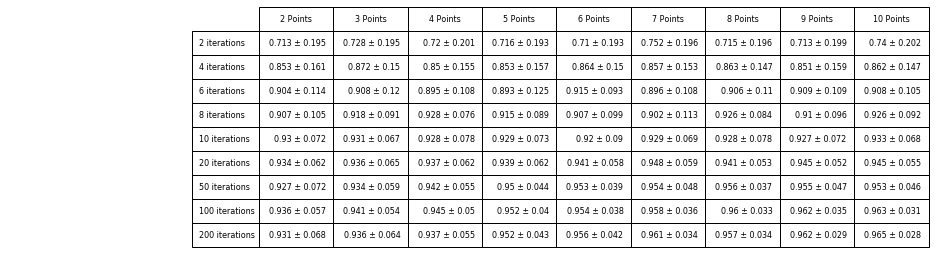

In [41]:
#make a table whose entries are strings of the mean +/- the std for each alpha,N pair
fig = plt.figure()
ax = fig.add_subplot(111)
col_labels = ('2 Points', '3 Points', '4 Points', '5 Points', '6 Points', '7 Points', '8 Points','9 Points', '10 Points')
row_labels = ['2 iterations', '4 iterations', '6 iterations', '8 iterations', '10 iterations', '20 iterations', '50 iterations', '100 iterations', '200 iterations']

the_table = plt.table(cellText=result_str_pla,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center right')
the_table.set_fontsize(30)
the_table.scale(2, 2)
ax.axis("off")

plt.show()
#fig.savefig('Prob_2_Part_C_from_code.pdf')

Again, comparing this with our table in Problem 1C, the algorithm seems to have a little more difficulty here.  But the results are surely very similar.  The difference between the two formations centers I picked here, must not be as different as the difference in the two Gaussian centers from Problem 1.

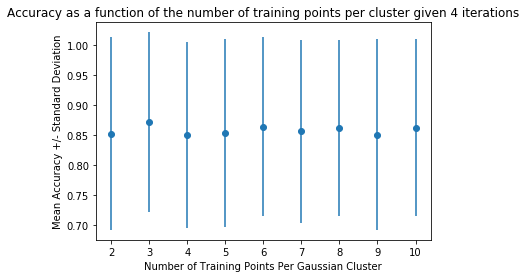

In [42]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[1,:]  #4 iterations
yerr = avg_stds[1,:] # 4 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 4 iterations")
plt.show()

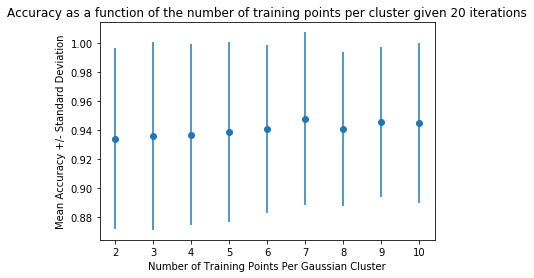

In [43]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[5,:]  #20 iterations
yerr = avg_stds[5,:] # 20 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 20 iterations")
plt.show()

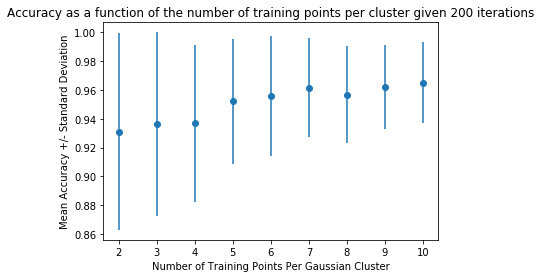

In [44]:
x = [2,3,4,5,6,7,8,9,10]
y = avg_means[8,:]  #200 iterations
yerr = avg_stds[8,:] # 200 iterations

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of Training Points Per Gaussian Cluster')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of the number of training points per cluster given 200 iterations")
plt.show()

Of the three previous figures, the first two show that with only 4 or 20 iterations, the standard deviation will be large, regardless of how many training points we used.  Although for 200 iterations, we see the number of training points made a difference.  In general, more iterations will improve the results, but at some point more iterations of the same points cannot help, so we really need to increase both the number of iterations and the number of training points together.

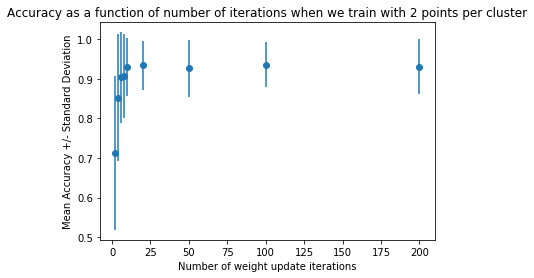

In [45]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,0]  #2 training points per cluster
yerr = avg_stds[:,0] #2 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 2 points per cluster")
plt.show()

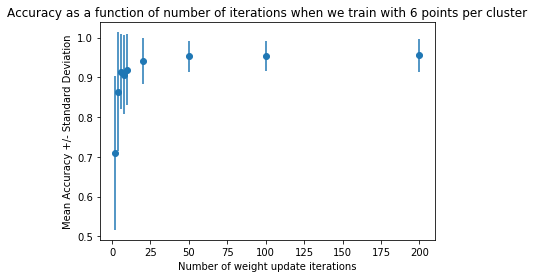

In [46]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,4]  #6 training points per cluster
yerr = avg_stds[:,4] #6 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 6 points per cluster")
plt.show()

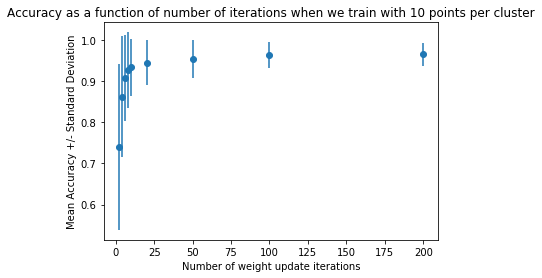

In [47]:
x = [2,4,6,8,10,20,50,100,200]
y = avg_means[:,8]  #10 training points per cluster
yerr = avg_stds[:,8] #10 training points per cluster

#plt.figure()
plt.errorbar(x, y, yerr, fmt='o')
plt.xlabel('Number of weight update iterations')
plt.ylabel('Mean Accuracy +/- Standard Deviation')
plt.title("Accuracy as a function of number of iterations when we train with 10 points per cluster")
plt.show()

Again, we really should use at least 20 iterations, and 100 seems to look pretty good.